**Importando as bibliotecas**

In [ ]:
import pandas as pd
import sklearn.model_selection as ms
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import io
from sklearn.metrics import r2_score
import numpy as np
import multiprocessing as mp
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importando Dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/autoscout24-germany-dataset.csv')

In [ ]:
df1 = df
df1.isnull().sum()

mileage        0
make           0
model        143
fuel           0
gear         182
offerType      0
price          0
hp            29
year           0
dtype: int64

In [ ]:
print("Numero de linhas antes:", df1.shape)
df1.dropna(subset=['model','gear','hp'], inplace=True)
print("Numero de linhas depois:", df1.shape)
print("\n\n\n", df1)

Numero de linhas antes: (46405, 9)
Numero de linhas depois: (46071, 9)



        mileage        make   model               fuel    gear       offerType  \
0       235000         BMW     316             Diesel  Manual            Used   
1        92800  Volkswagen    Golf           Gasoline  Manual            Used   
2       149300        SEAT    Exeo           Gasoline  Manual            Used   
3        96200     Renault  Megane           Gasoline  Manual            Used   
4       156000     Peugeot     308           Gasoline  Manual            Used   
...        ...         ...     ...                ...     ...             ...   
46400       99        Fiat     500  Electric/Gasoline  Manual  Pre-registered   
46401       99        Fiat     500  Electric/Gasoline  Manual  Pre-registered   
46402       99        Fiat     500  Electric/Gasoline  Manual  Pre-registered   
46403       99        Fiat     500  Electric/Gasoline  Manual  Pre-registered   
46404       99        Fiat     500

In [ ]:
df1['make'].value_counts()

make
Volkswagen    6907
Opel          4789
Ford          4410
Skoda         2874
Renault       2792
              ... 
Isuzu            1
Others           1
Zhidou           1
Brilliance       1
Alpine           1
Name: count, Length: 71, dtype: int64

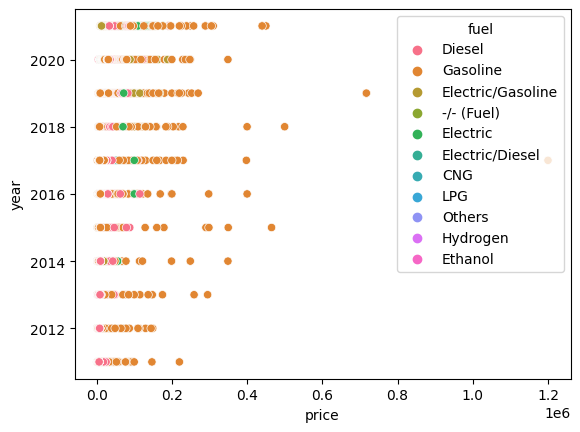

In [ ]:
fig = sns.scatterplot(data=df, x='price', y='year', hue='fuel')
plt.show(fig)

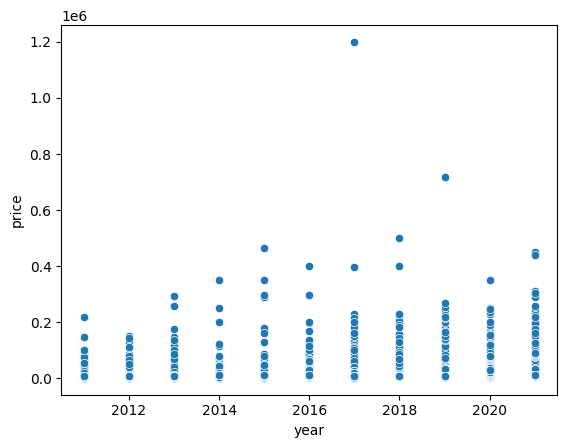

In [ ]:
fig = sns.scatterplot(data=df1, x='year', y='price')
plt.show(fig)

<AxesSubplot: xlabel='year', ylabel='price'>

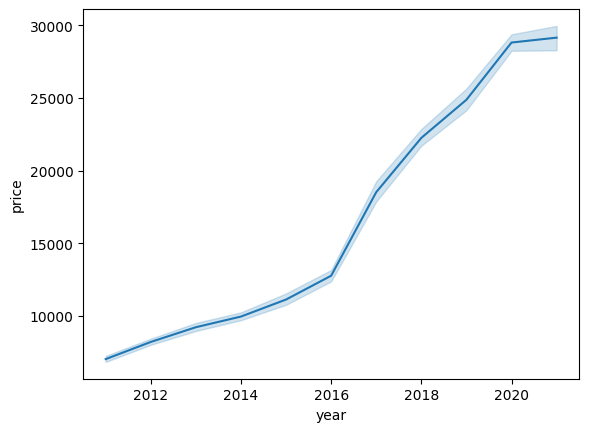

In [ ]:
sns.lineplot(x="year", y="price",data=df1)

**Modelos mais vendidos de carros**

In [ ]:
df1['model'].value_counts()

model
Golf                         1489
Corsa                        1485
Fiesta                       1273
Astra                        1190
Focus                         985
                             ... 
John Cooper Works Clubman       1
323                             1
Rodius                          1
Journey                         1
NV250                           1
Name: count, Length: 835, dtype: int64

In [ ]:
df1[(df1['price'] < 5000)]

,mileage,make,model,fuel,gear,offerType,price,hp,year
364,62302,Dacia,Sandero,Gasoline,Manual,Used,4700,73.0,2018
406,135000,smart,forTwo,Diesel,Automatic,Used,3940,54.0,2011
407,234730,Opel,Astra,Diesel,Automatic,Used,3949,160.0,2011
408,42571,Hyundai,i10,Gasoline,Manual,Used,3950,69.0,2011
409,368777,Volkswagen,Caddy,CNG,Manual,Used,3950,109.0,2011
...,...,...,...,...,...,...,...,...,...
40405,113121,Fiat,Punto,Gasoline,Manual,Used,4500,69.0,2016
40494,47000,Renault,Twizy,Electric,Automatic,Used,4700,11.0,2016
40855,116720,Mitsubishi,Space Star,Gasoline,Manual,Used,4500,71.0,2017
41301,9304,Renault,Twizy,Electric,Automatic,Used,4990,11.0,2017


In [ ]:
df['gear'] = df['gear'].astype('category')
df['make'] = df['make'].astype('category')
df['model'] = df['model'].astype('category')
df['fuel'] = df['fuel'].astype('category')
df['offerType'] = df['offerType'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46071 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   mileage    46071 non-null  int64   
 1   make       46071 non-null  category
 2   model      46071 non-null  category
 3   fuel       46071 non-null  category
 4   gear       46071 non-null  category
 5   offerType  46071 non-null  category
 6   price      46071 non-null  int64   
 7   hp         46071 non-null  float64 
 8   year       46071 non-null  int64   
dtypes: category(5), float64(1), int64(3)
memory usage: 2.1 MB


In [ ]:
px.histogram(df['price'])

In [ ]:
volks = df.loc[df['make'] == 'Volkswagen']

In [ ]:
y = volks['price']
volks1 = pd.get_dummies(volks)
volks1 = volks1.drop('price', axis=1, inplace=False)
X = volks1

In [ ]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.3, random_state=25)

In [ ]:
regressor = lm.LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:

y_pred = regressor.predict(X_test)

result = pd.DataFrame(y_pred)
result

,0
0,30765.133290
1,6943.660039
2,12422.881435
3,23909.476964
4,34527.566241
...,...
2068,7463.453543
2069,9522.898687
2070,46475.264828
2071,11707.963011


In [ ]:
r2_score(y_test, y_pred)

0.8729475839620091

**Caso 1:
João manifesta interesse em adquirir um automóvel, de preferência um modelo popular. Ao ponderar sobre suas opções, ele reconhece, por meio de conversas com outras pessoas, que veículos usados são mais acessíveis em comparação aos modelos novos. Contudo, dada sua falta de conhecimento específico sobre a qualidade de diferentes carros, ele se concentra na avaliação dos preços. Com uma alocação financeira de 20 mil, João, diante da vasta gama de opções disponíveis, encontra-se em um dilema. A seguir, apresentaremos algumas sugestões que oferecem uma ótima relação custo-benefício, considerando as preferências e a situação financeira de João.**

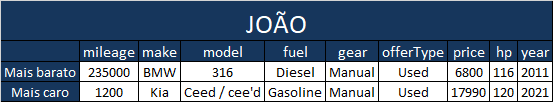

**Caso 2:
Rodrigo, desde a infância, nutre uma paixão por automóveis. Agora, após alcançar uma situação financeira sólida ao longo dos anos, decide empreender uma coleção de carros de luxo ou modelos com um apelo mais esportivo. Atualmente, está em busca de um automóvel esportivo, orientando-se pela identificação de ofertas vantajosas e comparando as características de desempenho dos diferentes veículos disponíveis no mercado.**

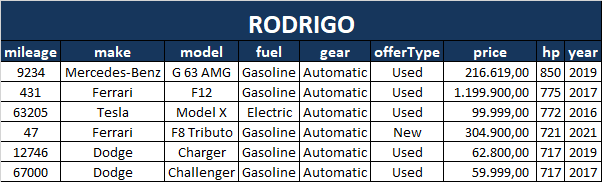

**Caso 3:
Aline está decidida a adquirir seu próprio automóvel. Conhecida por sua habilidade em encontrar ofertas vantajosas, ela se depara com uma certa perplexidade ao explorar os sites mais renomados, especialmente no que diz respeito à relação custo-benefício. A intenção dela é adquirir um veículo que não seja excessivamente antigo, mas que ainda assim atenda de forma eficiente às suas necessidades.**

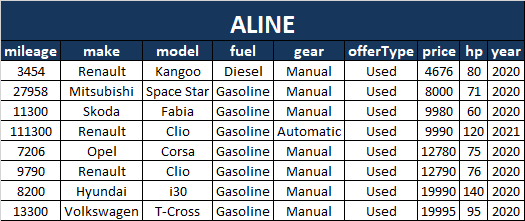

**Caso 4:
Mariana encontra-se em busca específica de um automóvel, visando a aquisição de um Chevrolet Astra para sua utilização diária no trabalho. Consciente do custo elevado dos modelos mais recentes no mercado de veículos novos, ela opta por explorar o segmento de carros usados. No entanto, a sua preferência recai sobre um veículo que apresente uma quilometragem relativamente baixa. A análise a seguir oferecerá uma abordagem detalhada para atender aos critérios estabelecidos em sua pesquisa.**

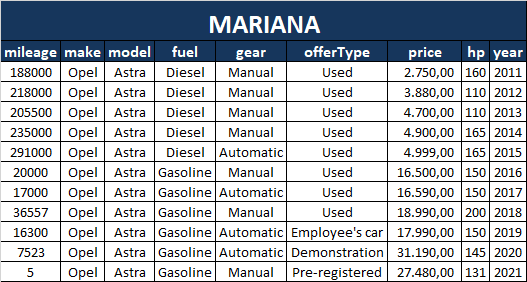

# Referencias Bibliograficas

•	https://www.datageeks.com.br/algoritmos-de-machine-learning/

•	https://fontana.paginas.ufsc.br/files/2018/03/apostila_ML_pt2.pdf

•	https://didatica.tech/o-que-e-e-como-funciona-o-algoritmo-knn/#:~:text=O%20KNN%20%C3%A9%20muito%20utilizado,rela%C3%A7%C3%A3o%20aos%20vizinhos%20mais%20pr%C3%B3ximos.

•	https://medium.com/kunumi/m%C3%A9tricas-de-avalia%C3%A7%C3%A3o-em-machine-learning-classifica%C3%A7%C3%A3o-49340dcdb198

•	https://blog.somostera.com/data-science/dataset

•	https://www.ibm.com/br-pt/cloud/learn/exploratory-data-analysis

•	https://www.datageeks.com.br/pre-processamento-de-dados/#:~:text=O%20pr%C3%A9%2Dprocessamento%20%C3%A9%20um,dos%20dados%20que%20ser%C3%A3o%20analisados.

•	https://www.computersciencemaster.com.br/como-tratar-valores-faltantes-em-um-dataset/

•	https://medium.com/@alegeorgelustosa/m%C3%A9todos-de-tratamento-para-dados-categ%C3%B3ricos-em-python-a66f910215c7

•	https://medium.com/ipnet-growth-partner/padronizacao-normalizacao-dados-machine-learning-f8f29246c12

• https://www.digitalocean.com/community/tutorials/how-to-use-the-python-filter-function-pt

• https://seaborn.pydata.org/tutorial/distributions.html

• https://pandas.pydata.org/docs/index.html

• https://vitorborbarodrigues.medium.com/visualiza%C3%A7%C3%A3o-de-dados-com-matplotlib-alguns-conceitos-intermedi%C3%A1rios-b33fcda50138

• https://acervolima.com/tutorial-python-seaborn/
